In [147]:
import Pkg
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("StatsPlots")
Pkg.add("DecisionTree")
Pkg.add("ScikitLearn")

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/

In [148]:
using Random
using CSV
using Plots
using DataFrames
using Statistics
using LinearAlgebra
using StatsPlots
using DecisionTree
using ScikitLearn

In [3]:
df = CSV.read("national.csv")

,sitecode,sitename,sitetype
,String,String,String
1,XX,United States (XX),National
2,XX,United States (XX),National
3,XX,United States (XX),National
4,XX,United States (XX),National
5,XX,United States (XX),National
6,XX,United States (XX),National
7,XX,United States (XX),National
8,XX,United States (XX),National
9,XX,United States (XX),National


In [4]:
df = select!(df, Not(:sitename))
df = select!(df, Not(:sitetype))
df = select!(df, Not(:sitetypenum))
df = select!(df, Not(:survyear))
df = select!(df, Not(:weight))
df = select!(df, Not(:stratum))
df = select!(df, Not(:PSU))
df = select!(df, Not(:record))

,sitecode,year,age,sex,grade,race4,race7,stheight,stweight,bmi
,String,Int64,String,String,String,String,String,String,String,String
1,XX,1991,NA,NA,1,3,4,NA,NA,NA
2,XX,1991,NA,NA,NA,NA,NA,NA,NA,NA
3,XX,1991,4,NA,2,1,6,NA,NA,NA
4,XX,1991,5,NA,2,1,6,NA,NA,NA
5,XX,1991,6,NA,NA,4,NA,NA,NA,NA
6,XX,1991,NA,2,4,3,4,NA,NA,NA
7,XX,1991,NA,2,4,3,4,NA,NA,NA
8,XX,1991,1,2,NA,4,NA,NA,NA,NA
9,XX,1991,1,2,3,1,6,NA,NA,NA


In [5]:
keep = df[:age].!="NA"
r_df = df[keep, :]
keep = r_df[:grade].!="NA"
r_df = r_df[keep, :]
keep = r_df[:sex].!="NA"
r_df = r_df[keep, :]
keep = r_df[:q41].!=" "
r_df = r_df[keep, :]

,sitecode,year,age,sex,grade,race4,race7,stheight,stweight,bmi
,String,Int64,String,String,String,String,String,String,String,String
1,XX,1991,1,2,2,4,NA,NA,NA,NA
2,XX,1991,1,2,1,4,2,NA,NA,NA
3,XX,1991,1,2,2,3,4,NA,NA,NA
4,XX,1991,1,2,1,4,NA,NA,NA,NA
5,XX,1991,2,2,1,2,3,NA,NA,NA
6,XX,1991,2,2,1,1,6,NA,NA,NA
7,XX,1991,2,2,1,2,3,NA,NA,NA
8,XX,1991,3,2,1,3,4,NA,NA,NA
9,XX,1991,3,2,1,1,6,NA,NA,NA


In [6]:
r_df = r_df[shuffle(1:end), :]
train_proportion = 0.6
val_proportion = 0.2
n = size(r_df, 1)
println("Size of dataset: ", string(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
ntrain = convert(Int, round(train_proportion*n))
nval = convert(Int, round(val_proportion*n))

target = r_df[:, :q41]
data = r_df[:, filter(col -> (col != :q41), names(r_df))]

#Now you will split the data to create training and test sets. 

# the following variable records the features of examples in the training set
train_x = data[1:ntrain,:]
val_x = data[ntrain+1:ntrain+nval,:]
# the following variable records the features of examples in the test set
test_x = data[ntrain+nval+1:n,:]
# the following variable records the labels of examples in the training set
train_y = target[1:ntrain,:]
val_y = target[ntrain+1:ntrain+nval,:]
# the following variable records the labels of examples in the test set
test_y = target[ntrain+nval+1:n,:]

Size of dataset: 199642


39929×1 Array{String,2}:
 "3"
 "1"
 "2"
 "4"
 "3"
 "1"
 "2"
 "1"
 "1"
 "5"
 "3"
 "5"
 "1"
 ⋮
 "1"
 "4"
 "1"
 "3"
 "4"
 "2"
 "2"
 "1"
 "1"
 "1"
 "1"
 "2"

In [12]:
"This function converts strings to int values.
Strings that cannot be represented as a number (like NA) are converted to zeros"
function string_to_int(str)
    try
        parse(Int, str)
    catch
       0.0
    end
end

string_to_int

In [13]:
"This function converts strings to floating point values.
Strings that cannot be represented as a number (like NA) are converted to zeros"
function string_to_float(str)
    try
        parse(Float64, str)
    catch
       0.0
    end
end

string_to_float

In [14]:
function ages(df)
    for i = 1:size(df,1)
        if df[i, :age] == "1"
            df[i, :age] = "12"
        elseif df[i, :age] == "2"
            df[i, :age] = "13"
        elseif df[i, :age] == "3"
            df[i, :age] = "14"
        elseif df[i, :age] == "4"
            df[i, :age] = "15"
        elseif df[i, :age] == "5"
            df[i, :age] = "16"
        elseif df[i, :age] == "6"
            df[i, :age] = "17"           
        elseif df[i, :age] == "7"
            df[i, :age] = "18"
        end
    end
    df[:age] = string_to_int.(df[:age])
    return df
end

ages (generic function with 1 method)

In [15]:
train_x1 = ages(train_x)
test_x1 = ages(test_x)
val_x1 = ages(val_x)

,sitecode,year,age,sex,grade,race4,race7,stheight,stweight,bmi
,String,Int64,Int64,String,String,String,String,String,String,String
1,XX,1991,15,2,1,4,2,NA,NA,NA
2,XX,1997,15,2,2,1,6,NA,NA,NA
3,XX,1995,15,1,1,2,3,NA,NA,NA
4,XX,2017,14,2,1,3,4,1.6,34.02,13.2891
5,XX,1995,15,2,1,4,NA,NA,NA,NA
6,XX,2015,15,2,2,4,7,1.78,90.72,28.6327
7,XX,1999,16,2,2,2,3,1.73,78.02,26.0684
8,XX,1995,15,1,1,3,4,NA,NA,NA
9,XX,1993,14,1,1,1,6,NA,NA,NA


In [19]:
function onehot(column, cats=unique(column))
    result = zeros(size(column, 1), length(cats))
    for i = 1:length(column)
        for j = 1:length(cats)
            if column[i] == cats[j]
                result[i,j] = 1
            end
        end
    end
    result
end

onehot (generic function with 2 methods)

In [55]:
function ordinal(column, cats)
    result = zeros(size(column, 1), length(cats)-1)
    for i = 1:length(column)
        for j = 1:length(cats)
            if column[i] == cats[j]
                for k = 1:j-1
                    result[i,k] = 1
                end
            end
        end
    end
    result
end

ordinal (generic function with 2 methods)

In [62]:
val_x1[:sex]

39928-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "2"
 "2"
 "1"
 "2"
 "2"
 "2"
 "2"
 "1"
 "1"
 "2"
 "2"
 "1"
 "2"
 ⋮
 "1"
 "2"
 "1"
 "2"
 "2"
 "1"
 "1"
 "1"
 "2"
 "2"
 "1"
 "1"

In [63]:
Xtrain = hcat(train_x1[:age], ones(ntrain))
Xval = hcat(val_x1[:age], ones(nval))
Xtrain = hcat(train_x1[:year], Xtrain)
Xval = hcat(val_x1[:year], Xval)
Xtrain = hcat(onehot(train_x1[:sex], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:sex], ["1", "2"]), Xval)
Xtrain = hcat(onehot(train_x1[:q23], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q23], ["1", "2"]), Xval)
Xtrain = hcat(onehot(train_x1[:q24], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q24], ["1", "2"]), Xval)
Xtrain = hcat(onehot(train_x1[:q30], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q30], ["1", "2"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q32], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q32], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q33], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q33], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q31], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q31], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(onehot(train_x1[:q34], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q34], ["1", "2"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q35], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q35], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q45], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q45], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q31], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q31], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q31], ["1", "2", "3", "4", "5", "6"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q31], ["1", "2", "3", "4", "5", "6"]), Xval)
Xtrain = hcat(onehot(train_x1[:q58], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q58], ["1", "2"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q71], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q71], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q75], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q75], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q77], ["1", "2", "3", "4", "5", "6", "7", "8"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q77], ["1", "2", "3", "4", "5", "6", "7", "8"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q88], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q88], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(onehot(train_x1[:q89], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(onehot(val_x1[:q89], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(onehot(train_x1[:sexid], ["1", "2", "3", "4"]), Xtrain)
Xval = hcat(onehot(val_x1[:sexid], ["1", "2", "3", "4"]), Xval)
Xtrain = hcat(onehot(train_x1[:q25], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q25], ["1", "2"]), Xval)

39928×94 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  1991.0  15.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1997.0  15.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1995.0  15.0  1.0
 1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0     0.0  0.0  1.0  2017.0  14.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1995.0  15.0  1.0
 0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  …  1.0  0.0  1.0  2015.0  15.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1999.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1995.0  15.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1993.0  14.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  1.0  2011.0  14.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  …  1.0  0.0  1.0  2009.0  14.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1993.0  15.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  

In [7]:
?RandomForestClassifer

search: RandomForestClassifier



```
RandomForestClassifier(; n_subfeatures::Int=-1,
                       n_trees::Int=10,
                       partial_sampling::Float=0.7,
                       max_depth::Int=-1,
                       rng=Random.GLOBAL_RNG)
```

Random forest classification. See [DecisionTree.jl's documentation](https://github.com/bensadeghi/DecisionTree.jl)

Hyperparameters:

  * `n_subfeatures`: number of features to consider at random per split (default: -1, sqrt(# features))
  * `n_trees`: number of trees to train (default: 10)
  * `partial_sampling`: fraction of samples to train each tree on (default: 0.7)
  * `max_depth`: maximum depth of the decision trees (default: no maximum)
  * `min_samples_leaf`: the minimum number of samples each leaf needs to have
  * `min_samples_split`: the minimum number of samples in needed for a split
  * `min_purity_increase`: minimum purity needed for a split
  * `rng`: the random number generator to use. Can be an `Int`, which will be used to seed and create a new random number generator. Multi-threaded forests must be seeded with an `Int`

Implements `fit!`, `predict`, `predict_proba`, `get_classes`


In [81]:
clf = RandomForestClassifier()

RandomForestClassifier
n_trees:             10
n_subfeatures:       -1
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             nothing
ensemble:            nothing

In [82]:
fit!(clf, Xtrain, train_y[:,1])

RandomForestClassifier
n_trees:             10
n_subfeatures:       -1
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             ["1", "2", "3", "4", "5", "6", "7"]
ensemble:            Ensemble of Decision Trees
Trees:      10
Avg Leaves: 27474.3
Avg Depth:  38.4

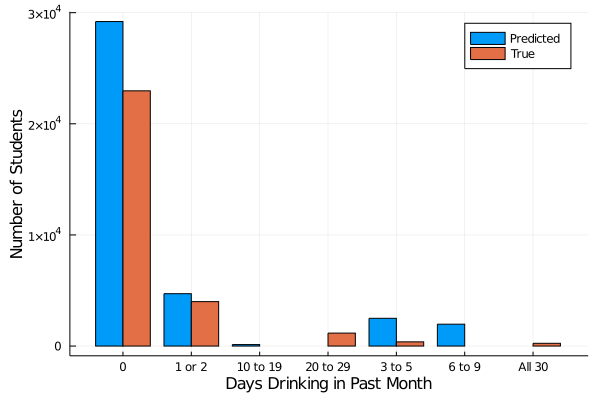

In [198]:
val_pred = predict(clf, Xval)

u=unique(val_pred)
pred_counts=[(count(x->x==i,val_pred)) for i in u]

u=unique(val_y)
y_counts=[(count(x->x==i,val_y)) for i in u]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 5)
group = repeat(["0", "1 or 2", "3 to 5", "6 to 9", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [203]:
accuracy = CrossValidation.cross_val_score(clf, Xtrain, train_y[:,1], cv=5)

5-element Array{Float64,1}:
 0.5758106923751095
 0.572728411035519
 0.5720070128569044
 0.5698601544562721
 0.5711780913417384

In [208]:
clf2 = RandomForestClassifier(n_trees = 50, n_subfeatures= 10)

RandomForestClassifier
n_trees:             50
n_subfeatures:       10
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             nothing
ensemble:            nothing

In [209]:
fit!(clf2, Xtrain, train_y[:,1])

RandomForestClassifier
n_trees:             50
n_subfeatures:       10
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             ["1", "2", "3", "4", "5", "6", "7"]
ensemble:            Ensemble of Decision Trees
Trees:      50
Avg Leaves: 27432.22
Avg Depth:  38.06

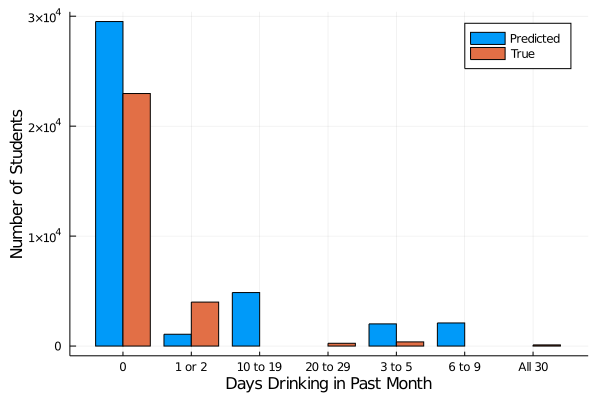

In [210]:
val_pred = predict(clf2, Xval)

u=unique(val_pred)
pred_counts=[(count(x->x==i,val_pred)) for i in u]

u=unique(val_y)
y_counts=[(count(x->x==i,val_y)) for i in u]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 5)
group = repeat(["0", "1 or 2", "3 to 5", "6 to 9", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [211]:
accuracy = CrossValidation.cross_val_score(clf2, Xtrain, train_y[:,1], cv=5)

5-element Array{Float64,1}:
 0.581653520303827
 0.5795316999874786
 0.5780597762564702
 0.5790022959716135
 0.5809050680470903

In [212]:
clf3 = RandomForestClassifier(n_trees = 5, n_subfeatures= 45)

RandomForestClassifier
n_trees:             5
n_subfeatures:       45
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             nothing
ensemble:            nothing

In [213]:
fit!(clf3, Xtrain, train_y[:,1])

RandomForestClassifier
n_trees:             5
n_subfeatures:       45
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             ["1", "2", "3", "4", "5", "6", "7"]
ensemble:            Ensemble of Decision Trees
Trees:      5
Avg Leaves: 22983.8
Avg Depth:  36.2

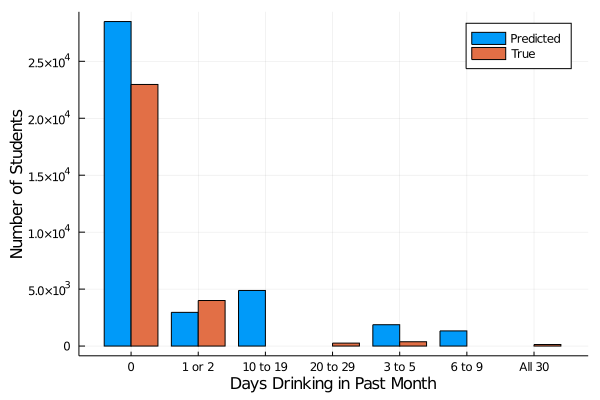

In [222]:
val_pred = predict(clf3, Xval)

u=unique(val_pred)
pred_counts=[(count(x->x==i,val_pred)) for i in u]

u=unique(val_y)
y_counts=[(count(x->x==i,val_y)) for i in u]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 5)
group = repeat(["0", "1 or 2", "3 to 5", "6 to 9", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [215]:
accuracy = CrossValidation.cross_val_score(clf3, Xtrain, train_y[:,1], cv=5)

5-element Array{Float64,1}:
 0.562914736446726
 0.5598313786051171
 0.5568542327600601
 0.5617616364015863
 0.5639559155047174

In [219]:
for trees = 5:20:100
    for subfeatures = 2:20:45
        clf = RandomForestClassifier(n_trees = trees, n_subfeatures= subfeatures)
        fit!(clf, Xtrain, train_y[:,1])
        println("trees: ", trees)
        println("subfeatures: ", subfeatures)
        accuracy = CrossValidation.cross_val_score(clf3, Xtrain, train_y[:,1], cv=5)
        println(sum(accuracy)/5)
    end
end

trees: 5
subfeatures: 2
0.5606126976702878
trees: 5
subfeatures: 22
0.5579998617567183
trees: 5
subfeatures: 42
0.5615227223300043
trees: 25
subfeatures: 2
0.562073618573969
trees: 25
subfeatures: 22
0.5601701939916486
trees: 25
subfeatures: 42
0.5606461256735014
trees: 45
subfeatures: 2
0.5606127687423291
trees: 45
subfeatures: 22
0.5601786921189083
trees: 45
subfeatures: 42
0.5609549580647986
trees: 65
subfeatures: 2
0.5601119402930383
trees: 65
subfeatures: 22
0.560470776709866
trees: 65
subfeatures: 42
0.5592518049949066
trees: 85
subfeatures: 2
0.5602789078408298
trees: 85
subfeatures: 22
0.5605458311914109
trees: 85
subfeatures: 42
0.559669381563067


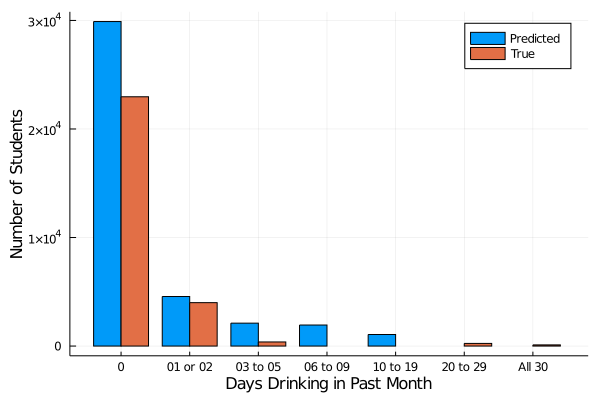

In [225]:
clfbest = RandomForestClassifier(n_trees = 25, n_subfeatures= 2)
fit!(clfbest, Xtrain, train_y[:,1])
val_pred = predict(clfbest, Xval)

u=unique(val_pred)
pred_counts=[(count(x->x==i,val_pred)) for i in u]

u=unique(val_y)
y_counts=[(count(x->x==i,val_y)) for i in u]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 5)
group = repeat(["0", "01 or 02", "03 to 05", "06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")